In [5]:
import numpy as np
import matplotlib.pyplot as plt
from worldModels import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [6]:
world = PersistentWorld(rates=np.array([[1, 0], [0, 1]]), ntrials=[30, 40])
agent = ConstantProbAgent(0.5)

exp = Experiment(agent, world)
choices, rewards = exp.run()
# choices = []
# rewards = []

# choice = agent.make_choice()
# #print('choice = ', int(choice))
# #choices.append(choice)
# reward = world.update(choice)
# #print('reward = ', int(reward))
# #agent.outcome_received(reward)
# #rewards.append(reward)

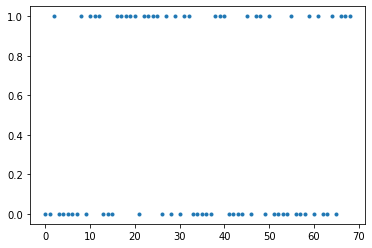

In [7]:
plt.plot(rewards, '.')

In [8]:
def simulate_p_strategy(ntrials, pworld, pagent):
    world = RandomWorld([pworld], [10000])
    # Say we pick the choice randomly with prob 0.2
    choices = []
    rewards = []
    for i in range(ntrials):
        choice = np.random.rand() < pagent
        #print('choice = ', int(choice))
        choices.append(choice)
        reward = world.update(choice)
        rewards.append(reward)
        
    efficiency = np.sum(rewards) / ntrials
    return efficiency
    
        
        

In [9]:
# Let's plot the dependence on the p-strategy
N = 20
plst = np.linspace(0, 1, N)
results = np.zeros((N, N))
for idworld, pworld in enumerate(plst):
    for idagent, pagent in enumerate(plst):
        efficiency = simulate_p_strategy(1000, pworld=pworld, pagent=pagent)
        results[idworld][idagent] = efficiency
    

In [10]:
def simulate_local_agent(tau):
    nblocks = 10
    raw_rates = np.random.rand(nblocks)
    rates = np.vstack((1-raw_rates, raw_rates)).T
    ntrials = np.random.uniform(low=5, high=10, size=nblocks).astype('int')
    
#     world = RandomWorld(rates=rates, ntrials=ntrials)
    world = PersistentWorld(rates=rates, ntrials=ntrials)
    agent = LocalMatchingAgent(tau)
#     agent = PiecewiseConstantProbAgent(rates=rates, ntrials=ntrials)
#     agent = ConstantProbAgent(0.5)
    # agent = MatchingAgent()
    exp = Experiment(agent, world)
    exp.run()  
    return agent.find_efficiency()


def simulate_piecewise_agent(tau):
    nblocks = 6
    raw_rates = np.random.rand(nblocks)
    rates = np.vstack((1-raw_rates, raw_rates)).T
    ntrials = np.random.uniform(low=100, high=200, size=nblocks).astype('int')
    
#     world = RandomWorld(rates=rates, ntrials=ntrials)
    world = PersistentWorld(rates=rates, ntrials=ntrials)
    agent = PiecewiseConstantProbAgent(rates=raw_rates, ntrials=ntrials)
    exp = Experiment(agent, world)
    exp.run()  
    return agent.find_efficiency()

In [11]:
taulst = np.arange(1, 10)
N = 100
results = np.zeros((len(taulst), N))
for idx, tau in enumerate(taulst):
    for iter in range(N):
        prob = simulate_local_agent(tau)
        results[idx, iter] = prob
    

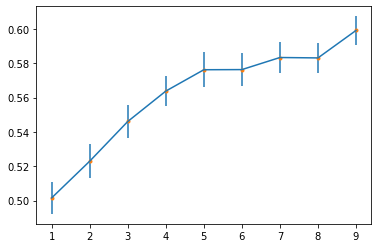

In [12]:
plt.errorbar(taulst, np.mean(results, axis=1), np.std(results, axis=1) / np.sqrt(N))
plt.plot(taulst, np.mean(results, axis=1), '.')

In [14]:
nblocks = 2
raw_rates = np.array([1, 0]) #np.random.rand(nblocks)
rates = np.vstack((1-raw_rates, raw_rates)).T
ntrials = [20, 90] #np.random.uniform(low=100, high=200, size=nblocks).astype('int')

#     world = RandomWorld(rates=rates, ntrials=ntrials)
world = PersistentWorld(rates=rates, ntrials=ntrials)
agent = LocalMatchingAgent(30)
exp = Experiment(agent, world)
choices, rewards = exp.run()  






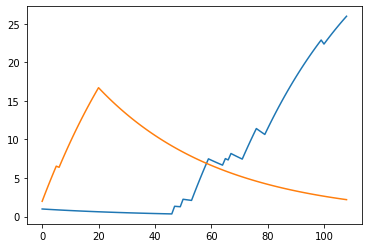

In [15]:
plt.plot(agent.Rewards0side_history[0:])
plt.plot(agent.Rewards1side_history[0:])

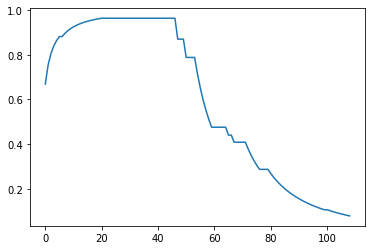

In [16]:
p1 = np.array(agent.Rewards1side_history)
p2 = np.array(agent.Rewards0side_history)
plt.plot(p1 / (p1 + p2))


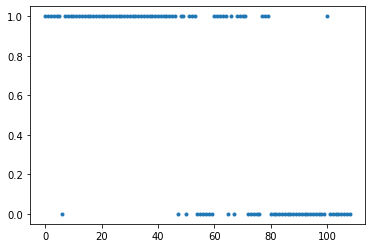

In [17]:
plt.plot(choices, '.')

In [18]:
world = RandomWorld(rates=[0.8, 0.2, 0.8, 0.2], ntrials=[100, 100, 100, 100])
agent = LocalMatchingAgent(0.98)
# agent = ConstantProbAgent(0.2)
# agent = MatchingAgent()
exp = Experiment(agent, world)
choices, rewards = exp.run()  

In [19]:
agent.find_efficiency()

0.010025062656641603

Text(0.5, 1.0, 'Rewards')

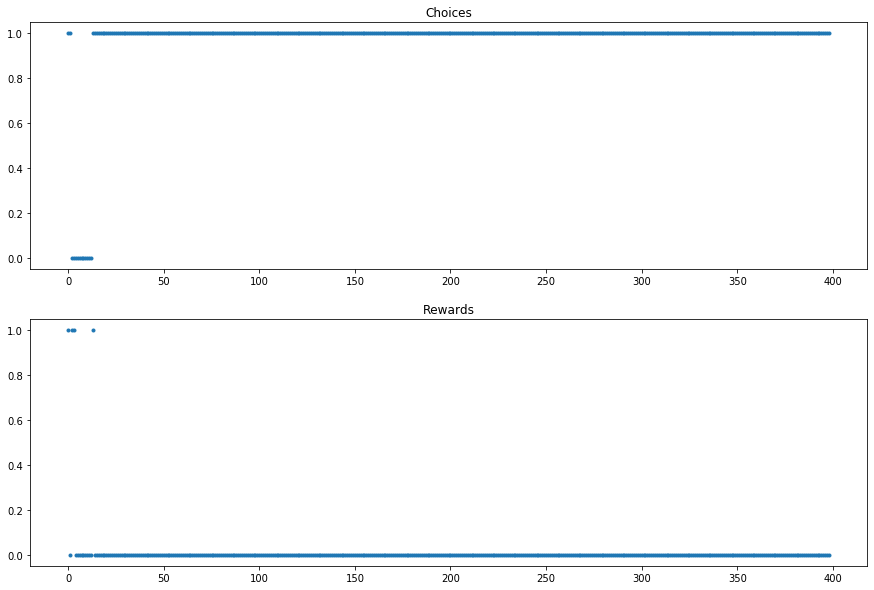

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.plot(choices, '.')
plt.title('Choices')

plt.subplot(212)
plt.plot(rewards, '.')
plt.title('Rewards')

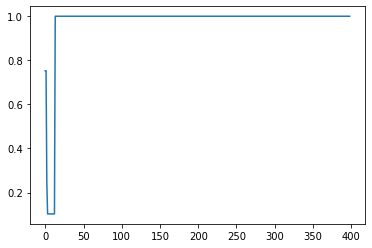

In [21]:
phist = np.array(agent.Rewards1side_history) / (np.array(agent.Rewards0side_history) + np.array(agent.Rewards1side_history))
plt.figure()
plt.plot(phist)

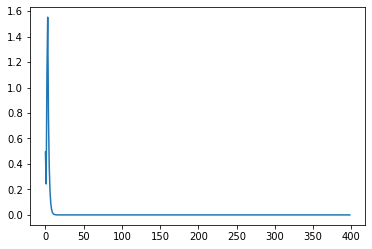

In [23]:
plt.plot(agent.Rewards0side_history)

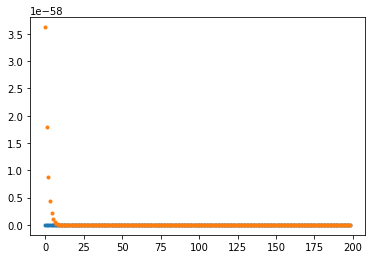

In [24]:
plt.plot(agent.Rewards0side_history[200:400], '.')
plt.plot(agent.Rewards1side_history[200:400], '.')

In [25]:
nblocks = 20
rates = np.random.rand(nblocks)
ntrials = np.random.uniform(low=100, high=200, size=nblocks).astype('int')

world = RandomWorld(rates=[0.99, 0.01], ntrials=[134, 150])
agent = PiecewiseConstantProbAgent(rates=[0.99, 0.01], ntrials=[134, 150])
exp = Experiment(agent, world)
choices, rewards = exp.run()  

In [26]:
nblocks = 20
ratesRaw = np.random.rand(nblocks)
rates = np.vstack((ratesRaw, 1-ratesRaw)).T
ntrials = np.random.uniform(low=100, high=200, size=nblocks).astype('int')

world = PersistentWorld(rates=rates, ntrials=ntrials)
#     agent = LocalMatchingAgent(tau)
#     agent = PiecewiseConstantProbAgent(rates=rates, ntrials=ntrials)
agent = LocalMatchingAgent(60)

exp = Experiment(agent, world)
choices, rewards = exp.run()  
print(agent.find_efficiency())

0.6303664921465969


In [ ]:
boundaries = np.cumsum(ntrials)
boundaries = np.concatenate(([0], boundaries))
boundaries

In [29]:
for i in range(len(rates)):
    blockeff = sum(rewards[boundaries[i]:boundaries[i+1]]) / ntrials[i]
    print(blockeff)

NameError: name 'boundaries' is not defined